In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pynput import keyboard
import time

In [2]:
class MyListener(keyboard.Listener):
    def __init__(self):
        super(MyListener, self).__init__(self.on_press, self.on_release)
        self.key_pressed = None

    def on_press(self, key):
        self.key_pressed = key

    def on_release(self, key):
        self.key_pressed = None

In [3]:
class Environment(object):
    
    def __init__(self):
        self.initBoard()
    
    def initBoard(self):
        self.board = np.zeros((4,4))
        self.newPiece()
    
    def updateBoard(self, move):
        print(move)
        self.shift(move)
        self.newPiece()
        print(self.getBoard())
    
    def shift(self, move):
        board = self.board
        for i in range(0, 4):
            if move == 'left':
                print('in left')
                row = board[i]
                temp = [num for num in row if num != 0]
                temp = temp + [0] * (4 - len(temp))
                board[i] = self.concatRow(temp)
            elif move == 'up':
                col = board[:,i]
                temp = [num for num in col if num != 0]
                temp = temp + [0] * (4 - len(temp))
                board[:,i] = self.concatRow(temp)
            elif move == 'right':
                row = board[i]
                temp = [num for num in row if num != 0]
                temp = [0] * (4 - len(temp)) + temp 
                temp = list(reversed(temp))
                board[i] = list(reversed(self.concatRow(temp)))
            elif move == 'down':
                row = board[:,i]
                temp = [num for num in row if num != 0]
                temp = [0] * (4 - len(temp)) + temp 
                temp = list(reversed(temp))
                board[:,i] = list(reversed(self.concatRow(temp)))
        self.board = board
        
    def concatRow(self, row):
        new_row = []
        ix = 0
        while ix < len(row):
            if ix < len(row) - 1 and row[ix] == row[ix + 1] and not row[ix] == 0:
                new_row = new_row + [int(row[ix]*2)]
                ix += 2
                print(ix)
            else:
                new_row = new_row + [row[ix]]
                ix += 1
        print(new_row)
        new_row = new_row + [0] * (4 - len(new_row))
        return new_row
    
    def newPiece(self):
        board = self.board.reshape((16,1))
        empty = 0
        while empty == 0:
            ix = np.random.randint(16)
            if board[ix] == 0:
                empty = 1
                board[ix] = np.random.randint(1,3)
        self.board = board.reshape((4,4))
        
    def getBoard(self):
        return self.board
    
    def gameOver(self):        
        # Check if all locations are full
        if len(np.where(self.board == 0)[0]) == 0:
            # Check if any adjacent pieces. If one has a same adjacent tile
            # then return False. The game is not over.
            for i in range(0, 4):
                for j in range(0, 4):
                    value = self.board[i, j]
                    for off in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                        ix = (i+off[0], j+off[1])
                        if not (ix[0]<0 or ix[0]>3 or ix[1]<0 or ix[1]>3):
                            if self.board[ix] == value: return False               
            return True
        return False # If there are still empty places the game is not over
    
    def plotBoard(self):
        plt.imshow(self.board, cmap = 'gray_r')
        plt.show()

[[ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


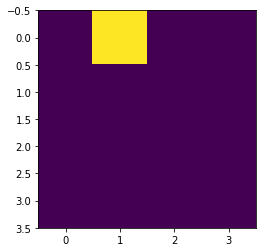

In [ ]:
from pynput import keyboard

listener = MyListener()
listener.start()
env = Environment()

print(env.getBoard())

plt.imshow(env.getBoard())
plt.show()

counter = 0
while (not env.gameOver()) and counter < 4:
    time.sleep(0.1)
    key_pressed = listener.key_pressed
    
    while not listener.key_pressed == None:
        pass
    
    if key_pressed == keyboard.Key.up:
        env.updateBoard('up')
        plt.imshow(env.getBoard())
        plt.show()
        counter += 1
    if key_pressed == keyboard.Key.right:
        env.updateBoard('right')
        plt.imshow(env.getBoard())
        plt.show()
        counter += 1
    if key_pressed == keyboard.Key.down:
        env.updateBoard('down')
        plt.imshow(env.getBoard())
        plt.show()
        counter += 1
    if key_pressed == keyboard.Key.left:
        env.updateBoard('left')
        plt.imshow(env.getBoard())
        plt.show()
        counter += 1

print('Game Over')
print('DONE!')

In [10]:
a = [0, 0, 1, 1]

print(a)

[0, 0, 1, 1]


In [11]:
non_zero_list = [num for num in a if num != 0]

non_zero_list + [0] * (4 - len(non_zero_list))

[1, 1, 0, 0]

In [12]:
non_zero_list

[1, 1]

In [13]:
row = [2, 2, 2, 2]

temp = [num for num in row if num != 0]
row = temp + [0] * (4 - len(temp))

print(row)

new_row = []
ix = 0

while ix < len(row):
    if ix < len(row) - 1:
        if row[ix] == row[ix + 1] and not row[ix] == 0:
            new_row = new_row + [row[ix]*2]
            ix += 2
            print(ix)
        else:
            new_row = new_row + [row[ix]]
            ix += 1
    else:
        new_row = new_row + [row[ix]]
        ix += 1
    
print(new_row)

new_row = new_row + [0] * (4 - len(new_row))

print(new_row)

[2, 2, 2, 2]
2
4
[4, 4]
[4, 4, 0, 0]


In [14]:
row = [2, 2, 2, 4]

temp = [num for num in row if num != 0]
row = [0] * (4 - len(temp)) + temp 

print(row)

new_row = []
ix = len(row) - 1

while ix >= 0:
    if ix > 0:
        print(row[ix])
        if row[ix] == row[ix - 1] and not row[ix] == 0:
            new_row = [row[ix]*2] + new_row
            ix -= 2
            print(ix)
        else:
            new_row = [row[ix]] + new_row
            ix -= 1
    else:
        new_row = [row[ix]] + new_row
        ix -= 1
    
print(new_row)

new_row = [0] * (4 - len(new_row)) + new_row

print(new_row)

[2, 2, 2, 4]
4
2
0
[2, 4, 4]
[0, 2, 4, 4]


In [15]:
row = [2, 2, 2, 4]
list(reversed(row))

[4, 2, 2, 2]